In [46]:
# import dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors
from functools import reduce
from config import api_key

In [2]:
# url for Carbon Dioxide Emissions from Petroleum and Other Liquid Fuels, Annual
pt_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.PATCCO2.A"

In [3]:
# get the json data
pt_emissions = requests.get(pt_url).json()
print(json.dumps(pt_emissions, indent=4, sort_keys=True))

{
    "request": {
        "command": "series",
        "series_id": "STEO.PATCCO2.A"
    },
    "series": [
        {
            "copyright": "None",
            "data": [
                [
                    "2020",
                    2398.6246
                ],
                [
                    "2019",
                    2382.1237
                ],
                [
                    "2018",
                    2375.61878
                ],
                [
                    "2017",
                    2329.5180543
                ],
                [
                    "2016",
                    2312.6078371
                ],
                [
                    "2015",
                    2289.9803046
                ],
                [
                    "2014",
                    2246.5761322
                ],
                [
                    "2013",
                    2224.3562467
                ],
                [
                    "2012",
    

In [31]:
# collect year and valu from json data
year = []
value = []
units = 'million metric tons'
for x in pt_emissions['series'][0]['data']:
    year.append(x[0])
    value.append(x[1])
    
# Loop through to calculate the annual percent change
#i = 0
#percent_change_petroleum_emissions = []
#for z in pt_emissions:
#    if(i == 0):
#        percent_change_petroleum_emissions.append(0)
#    else:
#        percent_change_petroleum_emissions.append( (z - pt_emissions[i-1])/ pt_emissions[i-1] * 100)
#    i += 1
    
# make a dataframe
pt_emissions_df = pd.DataFrame({"Year": year, "Petroleum Emissions": value, "Units": units})
pt_emissions_df.head()

,Year,Petroleum Emissions,Units
0,2020,2398.624600,million metric tons
1,2019,2382.123700,million metric tons
2,2018,2375.618780,million metric tons
3,2017,2329.518054,million metric tons
4,2016,2312.607837,million metric tons


In [7]:
# Find minimum and maximum emissions for petroleum and other liquid fuels
min_emissions_value = pt_emissions_df["Petroleum Emissions"].min()
min_emissions_year = int(pt_emissions_df[pt_emissions_df["Petroleum Emissions"]==min_emissions_value].Year)
max_emissions_value = pt_emissions_df["Petroleum Emissions"].max()
max_emissions_year = int(pt_emissions_df[pt_emissions_df["Petroleum Emissions"]==max_emissions_value].Year)

# find the total petroleum and other liquid fuels emissions
total_emissions = pt_emissions_df["Petroleum Emissions"].sum()

# find the difference between most and least petroleum emissions
emissions_change = (max_emissions_value - min_emissions_value)

#find the percentage change from lowest year to highest year
emissions_percent_change = (emissions_change / min_emissions_value) *100

print(f"{int(min_emissions_year)} had the least amount of emissions from petroleum and other liquid fuels with {min_emissions_value} million meric tons.")
print(f"{int(max_emissions_year)} has the most amount of emissions from petroleum and other liquid fuels with {max_emissions_value} million meric tons.")
print(f"The total emissions from petroleum and other liquid fuels is {total_emissions} million metric tons.")
print(f"The difference in petroleum emissions from 1990 and 2020 is {emissions_change} million metric tons.")
print(f"The percentage change in petroleum emissions from the lowest year to highest year is {emissions_percent_change}%")

1991 had the least amount of emissions from petroleum and other liquid fuels with 2130.8555465 million meric tons.
2005 has the most amount of emissions from petroleum and other liquid fuels with 2622.7226458 million meric tons.
The total emissions from petroleum and other liquid fuels is 72840.92544339999 million metric tons.
The difference in petroleum emissions from 1990 and 2020 is 491.86709930000006 million metric tons.
The percentage change in petroleum emissions from the lowest year to highest year is 23.083080413775956%


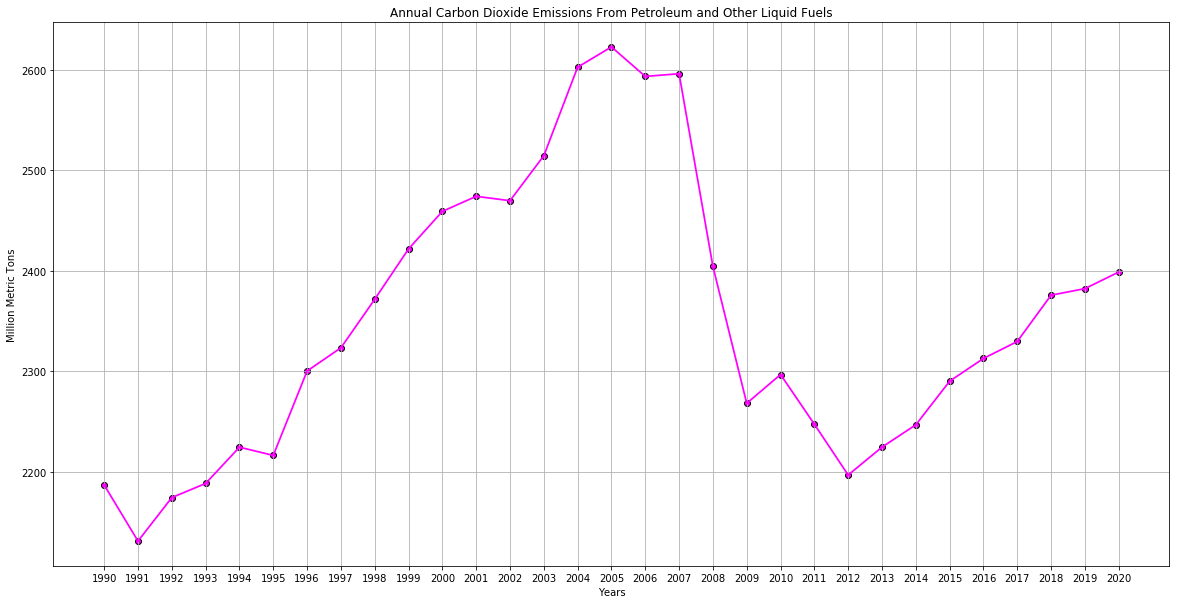

In [42]:
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))
# Create a visual for the data
plt.scatter(year, pt_emissions_df['Petroleum Emissions'], color="magenta", edgecolors="black")
plt.plot(year, pt_emissions_df['Petroleum Emissions'], color="magenta", linewidth=1.75)
plt.title("Annual Carbon Dioxide Emissions From Petroleum and Other Liquid Fuels")
plt.ylabel("Million Metric Tons")
plt.xlabel("Years")
plt.grid(True)
plt.gca().invert_xaxis()

# Save Figure
plt.savefig("output/petroleum_emissions.png")

# display the figure
plt.show()

In [8]:
# url for annual carbon dioxide emissions from natural gas
ng_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.NGTCCO2.A"

In [9]:
# get the json data
ng_emissions = requests.get(ng_url).json()
print(json.dumps(ng_emissions, indent=4, sort_keys=True))

{
    "request": {
        "command": "series",
        "series_id": "STEO.NGTCCO2.A"
    },
    "series": [
        {
            "copyright": "None",
            "data": [
                [
                    "2020",
                    1661.8332
                ],
                [
                    "2019",
                    1636.8881
                ],
                [
                    "2018",
                    1617.6484134
                ],
                [
                    "2017",
                    1473.9347923
                ],
                [
                    "2016",
                    1493.9813327
                ],
                [
                    "2015",
                    1482.9839654
                ],
                [
                    "2014",
                    1439.5261164
                ],
                [
                    "2013",
                    1409.35395
                ],
                [
                    "2012",
    

In [10]:
# collect year and value from json data
ng_year = []
ng_value = []
for x in ng_emissions['series'][0]['data']:
    ng_year.append(x[0])
    ng_value.append(x[1])
    
# make a dataframe
ng_emissions_df = pd.DataFrame({"Year": ng_year, "Natural Gas Emissions": ng_value, "Units": units})

ng_emissions_df.head()

,Year,Natural Gas Emissions,Units
0,2020,1661.833200,million metric tons
1,2019,1636.888100,million metric tons
2,2018,1617.648413,million metric tons
3,2017,1473.934792,million metric tons
4,2016,1493.981333,million metric tons


In [12]:
# Find minimum and maximum natural gas emissions
ng_min_emissions_value = ng_emissions_df["Natural Gas Emissions"].min()
ng_min_emissions_year = int(ng_emissions_df[ng_emissions_df["Natural Gas Emissions"]==ng_min_emissions_value].Year)
ng_max_emissions_value = ng_emissions_df["Natural Gas Emissions"].max()
ng_max_emissions_year = int(ng_emissions_df[ng_emissions_df["Natural Gas Emissions"]==ng_max_emissions_value].Year)

# find the total natural gas emissions
ng_total_emissions = ng_emissions_df["Natural Gas Emissions"].sum()

# find the difference between most and least emissions
ng_emissions_change = (ng_max_emissions_value - ng_min_emissions_value)

#find the percentage change from lowest year to highest year
ng_emissions_percent_change = (ng_emissions_change / ng_min_emissions_value) *100

print(f"{int(ng_min_emissions_year)} had the least amount of emissions from natural gas with {ng_min_emissions_value} million meric tons.")
print(f"{int(ng_max_emissions_year)} is projected to have the most amount of emissions from natural gas with {ng_max_emissions_value} million meric tons.")
print(f"The total emissions from natural gas is {ng_total_emissions} million metric tons.")
print(f"The difference in natural gas emissions from 1990 and 2020 is {ng_emissions_change} million metric tons.")
print(f"The percentage change in natural gas from the lowest year to highest year is {ng_emissions_percent_change}%")

1990 had the least amount of emissions from natural gas with 1026.437147 million meric tons.
2020 is projected to have the most amount of emissions from natural gas with 1661.8332 million meric tons.
The total emissions from natural gas is 39700.467451900004 million metric tons.
The difference in natural gas emissions from 1990 and 2020 is 635.3960529999999 million metric tons.
The percentage change in natural gas from the lowest year to highest year is 61.90306487417099%


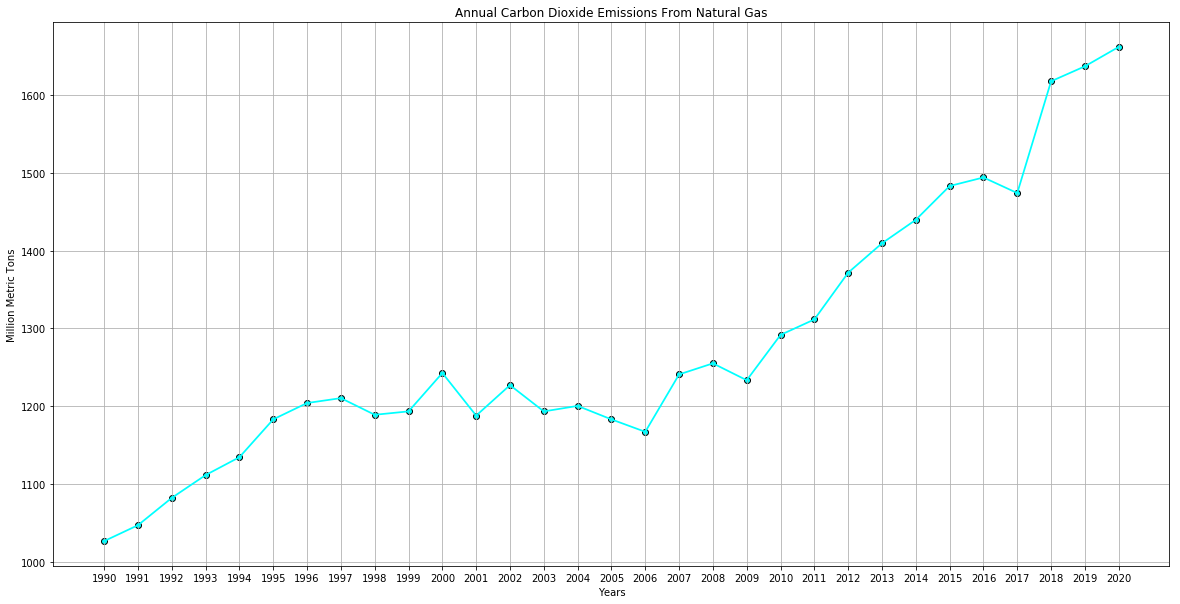

In [43]:
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))
# Create a visual for the data
plt.scatter(year, ng_emissions_df["Natural Gas Emissions"], color="cyan", edgecolors="black")
plt.plot(year, ng_emissions_df["Natural Gas Emissions"], color="cyan", linewidth=1.75)
plt.title("Annual Carbon Dioxide Emissions From Natural Gas")
plt.ylabel("Million Metric Tons")
plt.xlabel("Years")
plt.grid(True)
plt.gca().invert_xaxis()

# Save Figure
plt.savefig("output/natural_gas_emissions.png")

# display the figure
plt.show()

In [13]:
# url for annual carbon dioxide emissions from coal
c_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.CXTCCO2.A"

In [14]:
# get the json data
c_emissions = requests.get(c_url).json()
print(json.dumps(c_emissions, indent=4, sort_keys=True))

{
    "request": {
        "command": "series",
        "series_id": "STEO.CXTCCO2.A"
    },
    "series": [
        {
            "copyright": "None",
            "data": [
                [
                    "2020",
                    1109.92365
                ],
                [
                    "2019",
                    1177.27296
                ],
                [
                    "2018",
                    1269.4403272
                ],
                [
                    "2017",
                    1315.9754204
                ],
                [
                    "2016",
                    1354.1614478
                ],
                [
                    "2015",
                    1480.3240226
                ],
                [
                    "2014",
                    1713.5413644
                ],
                [
                    "2013",
                    1717.8293899
                ],
                [
                    "2012",


In [48]:
# collect year and value from json data
c_year = []
c_value = []
for x in c_emissions['series'][0]['data']:
    c_year.append(x[0])
    c_value.append(x[1])
    

    
# make a dataframe
c_emissions_df = pd.DataFrame({"Year": c_year, "Coal Emissions": c_value, "Units": units})

c_emissions_df.head()

,Year,Coal Emissions,Units
0,2020,1109.923650,million metric tons
1,2019,1177.272960,million metric tons
2,2018,1269.440327,million metric tons
3,2017,1315.975420,million metric tons
4,2016,1354.161448,million metric tons


In [16]:
# Find minimum and maximum coal emissions
c_min_emissions_value = c_emissions_df["Coal Emissions"].min()
c_min_emissions_year = int(c_emissions_df[c_emissions_df["Coal Emissions"]==c_min_emissions_value].Year)
c_max_emissions_value = c_emissions_df["Coal Emissions"].max()
c_max_emissions_year = int(c_emissions_df[c_emissions_df["Coal Emissions"]==c_max_emissions_value].Year)

# find the total natural gas emissions
c_total_emissions = c_emissions_df["Coal Emissions"].sum()

# find the difference between most and least emissions
c_emissions_change = (c_max_emissions_value - c_min_emissions_value)

#find the percentage change from lowest year to highest year
c_emissions_percent_change = (c_emissions_change / c_min_emissions_value) *100

print(f"{c_min_emissions_year} had the least amount of emissions from coal with {c_min_emissions_value} million meric tons.")
print(f"{int(c_max_emissions_year)} has the most amount of emissions from coal with {c_max_emissions_value} million meric tons.")
print(f"The total emissions from coal is {c_total_emissions} million metric tons.")
print(f"The difference in coal emissions from 2020 and 2005 is {c_emissions_change} million metric tons.")
print(f"The percentage change in coal from the lowest year to highest year is {c_emissions_percent_change}%")

2020 had the least amount of emissions from coal with 1109.92365 million meric tons.
2005 has the most amount of emissions from coal with 2181.8967085 million meric tons.
The total emissions from coal is 57109.253651800005 million metric tons.
The difference in coal emissions from 2020 and 2005 is 1071.9730585 million metric tons.
The percentage change in coal from the lowest year to highest year is 96.58079260677074%


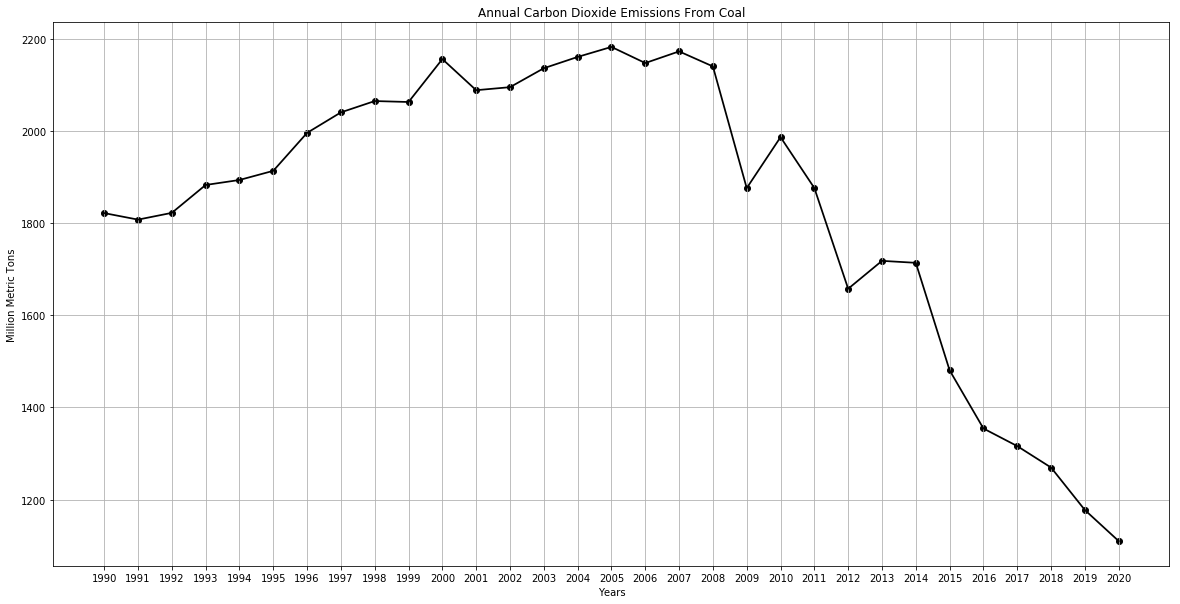

In [44]:
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))
# Create a visual for the data
plt.scatter(year, c_emissions_df["Coal Emissions"], color="black", edgecolors="black")
plt.plot(year, c_emissions_df["Coal Emissions"], color="black", linewidth=1.75)
plt.title("Annual Carbon Dioxide Emissions From Coal")
plt.ylabel("Million Metric Tons")
plt.xlabel("Years")
plt.grid(True)
plt.gca().invert_xaxis()

# Save Figure
plt.savefig("output/coal_emissions.png")

# display the figure
plt.show()

In [17]:
# url for annual total energy carbon dioxide emissions
cd_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.TETCCO2.A"

In [18]:
# get the json data
cd_emissions = requests.get(cd_url).json()
print(json.dumps(cd_emissions, indent=4, sort_keys=True))

{
    "request": {
        "command": "series",
        "series_id": "STEO.TETCCO2.A"
    },
    "series": [
        {
            "copyright": "None",
            "data": [
                [
                    "2020",
                    5182.0311
                ],
                [
                    "2019",
                    5207.9345
                ],
                [
                    "2018",
                    5274.3572906
                ],
                [
                    "2017",
                    5131.0780938
                ],
                [
                    "2016",
                    5172.400445
                ],
                [
                    "2015",
                    5264.7765886
                ],
                [
                    "2014",
                    5411.1928133
                ],
                [
                    "2013",
                    5363.0191015
                ],
                [
                    "2012",
   

In [19]:
# collect year and value from json data
cd_year = []
cd_value = []
for x in cd_emissions['series'][0]['data']:
    cd_year.append(x[0])
    cd_value.append(x[1])
    
# make a dataframe
cd_emissions_df = pd.DataFrame({"Year": cd_year, "Total Energy Co2 Emissions": cd_value, "Units": units})

cd_emissions_df.head()

,Year,Total Energy Co2 Emissions,Units
0,2020,5182.031100,million metric tons
1,2019,5207.934500,million metric tons
2,2018,5274.357291,million metric tons
3,2017,5131.078094,million metric tons
4,2016,5172.400445,million metric tons


In [20]:
# Find minimum and maximum total  emissions
cd_min_emissions_value = cd_emissions_df["Total Energy Co2 Emissions"].min()
cd_min_emissions_year = int(cd_emissions_df[cd_emissions_df["Total Energy Co2 Emissions"]==cd_min_emissions_value].Year)
cd_max_emissions_value = cd_emissions_df["Total Energy Co2 Emissions"].max()
cd_max_emissions_year = int(cd_emissions_df[cd_emissions_df["Total Energy Co2 Emissions"]==cd_max_emissions_value].Year)

# find the total natural gas emissions
cd_total_emissions = cd_emissions_df["Total Energy Co2 Emissions"].sum()

# find the difference between most and least emissions
cd_emissions_change = (cd_max_emissions_value - cd_min_emissions_value)

#find the percentage change from lowest year to highest year
cd_emissions_percent_change = (cd_emissions_change / cd_min_emissions_value) *100

print(f"{cd_min_emissions_year} had the least amount of total energy carbon emissions with {cd_min_emissions_value} million meric tons.")
print(f"{int(cd_max_emissions_year)} has the most amount of total energy carbon emissions with {cd_max_emissions_value} million meric tons.")
print(f"The total energy carbon emissions is {cd_total_emissions} million metric tons.")
print(f"The difference in total energy carbon emissions from 1991 and 2007 is {cd_emissions_change} million metric tons.")
print(f"The percentage change in coal from the lowest year to highest year is {cd_emissions_percent_change}%")

1991 had the least amount of total energy carbon emissions with 4992.6105868 million meric tons.
2007 has the most amount of total energy carbon emissions with 6020.6110693 million meric tons.
The total energy carbon emissions is 169979.02649609998 million metric tons.
The difference in total energy carbon emissions from 1991 and 2007 is 1028.0004824999996 million metric tons.
The percentage change in coal from the lowest year to highest year is 20.590439903683606%


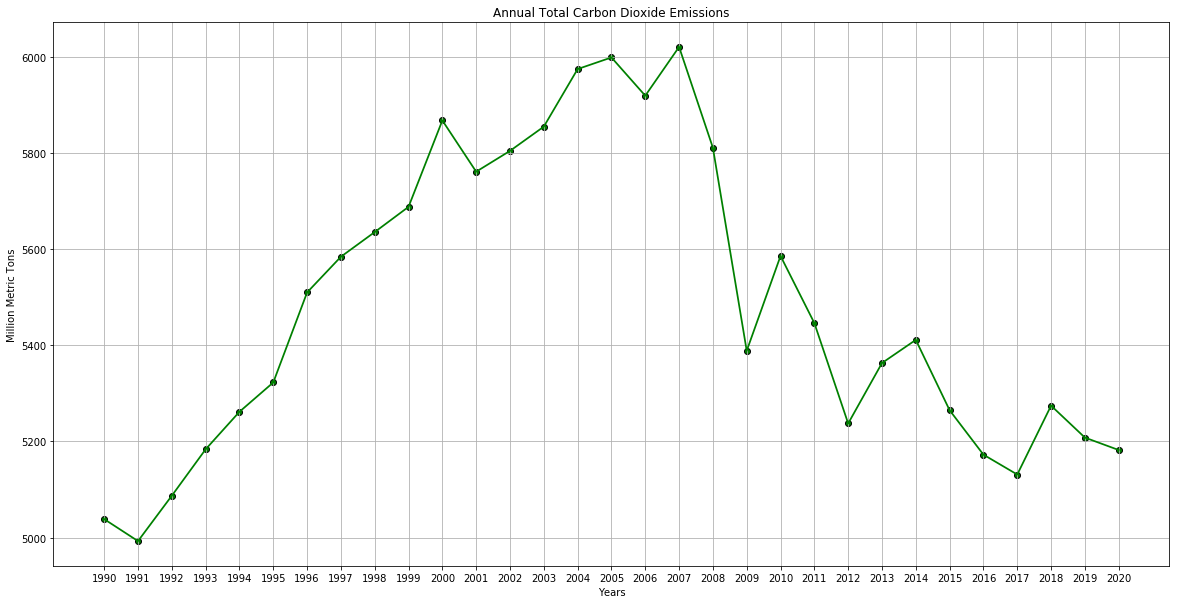

In [45]:
# Set the size of the figure to fit 30 years of data
plt.figure(figsize=(20,10))
# Create a visual for the data
plt.scatter(year, cd_value, color="green", edgecolors="black")
plt.plot(year, cd_value, color="green", linewidth=1.75)
plt.title("Annual Total Carbon Dioxide Emissions")
plt.ylabel("Million Metric Tons")
plt.xlabel("Years")
plt.grid(True)
plt.gca().invert_xaxis()

# Save Figure
plt.savefig("output/total_emissions.png")

# display the figure
plt.show()

In [21]:
# merge the dataframes

df_merge1 = pd.merge(ng_emissions_df, pt_emissions_df, on='Year' , how='inner')

df_merge2 = pd.merge(df_merge1 , c_emissions_df, on='Year' , how='inner')

emissions_df = pd.merge(df_merge2 , cd_emissions_df , on='Year' , how='inner')

emissions_df = emissions_df.drop(["Units_x", "Units_y"], axis=1)
emissions_df['Units'] = 'million metric tons'
emissions_df.head()

,Year,Natural Gas Emissions,Petroleum Emissions,Coal Emissions,Total Energy Co2 Emissions,Units
0,2020,1661.833200,2398.624600,1109.923650,5182.031100,million metric tons
1,2019,1636.888100,2382.123700,1177.272960,5207.934500,million metric tons
2,2018,1617.648413,2375.618780,1269.440327,5274.357291,million metric tons
3,2017,1473.934792,2329.518054,1315.975420,5131.078094,million metric tons
4,2016,1493.981333,2312.607837,1354.161448,5172.400445,million metric tons


ValueError: 'vertices' must be a 2D list or array with shape Nx2

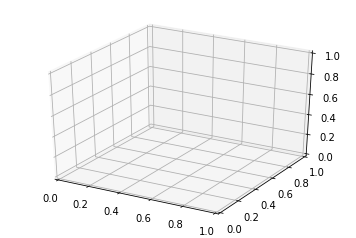

In [53]:
fig = plt.figure()
ax = fig.gca(projection='3d')

def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)


verts = [value , ng_value, c_value, cd_value]
zs = ['Petroleum' , 'Natural Gas', 'Coal', 'Total Carbon Dioxide']
ys = year


poly = PolyCollection(verts, facecolors=[cc('r'), cc('g'), cc('b'),
                                         cc('y')])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('Year')
ax.set_xlim3d(20, 10)
ax.set_ylabel('Million Metric Tons')
ax.set_zlabel('Z')
ax.set_zlim3d(0, 1)

plt.show()

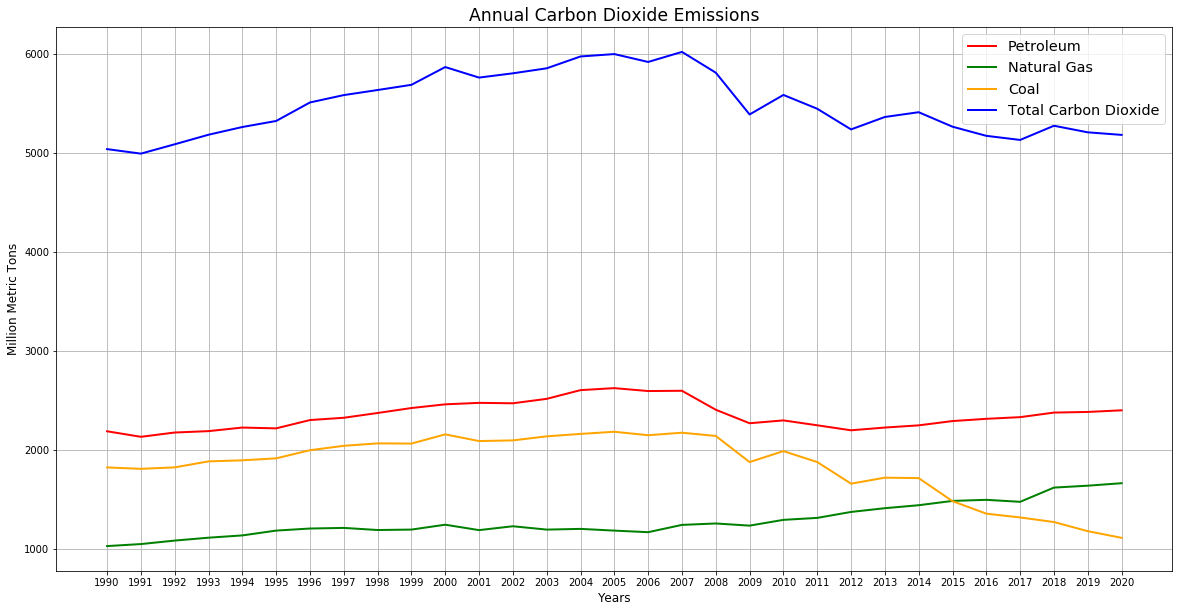

In [56]:
# US Carbon Dioxide Emissions
plt.figure(figsize=(20,10))

# # Create a visual for the combined data
plt.plot(year, value, label="Petroleum", color="red", linewidth=2.0)
plt.plot(year, ng_value, label="Natural Gas", color ="green", linewidth=2.0)
plt.plot(year, c_value, label="Coal", color="orange", linewidth=2.0)
plt.plot(year, cd_value, label="Total Carbon Dioxide", color="blue", linewidth=2.0)
plt.title("Annual Carbon Dioxide Emissions", fontsize="xx-large")
plt.ylabel("Million Metric Tons", fontsize="large")
plt.xlabel("Years", fontsize="large")
plt.legend(loc='best', frameon=True, fancybox=True, fontsize="x-large")
plt.grid(True)
plt.gca().invert_xaxis()

# Save Figure
plt.savefig("output/carbpn_dioxide_emissions.png")

# Display the figure
plt.show()